### Task 1: Data Wrangling

In [1]:
# importing the necessary modules for the project
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Loading the dataset
data=pd.read_csv('AusApparalSales4thQrt2020.csv')

In [3]:
# Having a sneak peak at data using head function
data.head()

,Date,Time,State,Group,Unit,Sales
0,1-Oct-2020,Morning,WA,Kids,8,20000
1,1-Oct-2020,Morning,WA,Men,8,20000
2,1-Oct-2020,Morning,WA,Women,4,10000
3,1-Oct-2020,Morning,WA,Seniors,15,37500
4,1-Oct-2020,Afternoon,WA,Kids,3,7500


In [4]:
# Checking the dataset for datatypes and null values
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7560 entries, 0 to 7559
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Date    7560 non-null   object
 1   Time    7560 non-null   object
 2   State   7560 non-null   object
 3   Group   7560 non-null   object
 4   Unit    7560 non-null   int64 
 5   Sales   7560 non-null   int64 
dtypes: int64(2), object(4)
memory usage: 354.5+ KB


#### Analysis: The date column in dataset is object type which needs to be converted into datetime.Also there are not any null values in the data , however we will cross verify this with  isna() and notna(). 

In [5]:
# Checking for any null values using isna() function
data.isna().sum()

Date     0
Time     0
State    0
Group    0
Unit     0
Sales    0
dtype: int64

In [6]:
# Checking for any null values using notna() function
data.notna().sum()

Date     7560
Time     7560
State    7560
Group    7560
Unit     7560
Sales    7560
dtype: int64

#### Analysis: As verified above, there are no null values in the data. 
#### In order to treat any null values in dataset, we would have followed the dropping of rows/columns if at least 30% of data were null. In case it is less than 30%, we would have gone with filling of data using mean. However this approach vary based on the criticality of fields being dropped.

In [7]:
# Coverting the Date column to datetime datatype from object
data['Date']= pd.to_datetime(data['Date'])

In [8]:
# Verifying the datatype of column Date has been changed.
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7560 entries, 0 to 7559
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    7560 non-null   datetime64[ns]
 1   Time    7560 non-null   object        
 2   State   7560 non-null   object        
 3   Group   7560 non-null   object        
 4   Unit    7560 non-null   int64         
 5   Sales   7560 non-null   int64         
dtypes: datetime64[ns](1), int64(2), object(3)
memory usage: 354.5+ KB


In [9]:
# Verifying the data again
data.head()

,Date,Time,State,Group,Unit,Sales
0,2020-10-01,Morning,WA,Kids,8,20000
1,2020-10-01,Morning,WA,Men,8,20000
2,2020-10-01,Morning,WA,Women,4,10000
3,2020-10-01,Morning,WA,Seniors,15,37500
4,2020-10-01,Afternoon,WA,Kids,3,7500


In [10]:
# Data in Sales and Unit columns need to be normalized as the range of data are quite high. 
#We will use minMax scaling using sklearn to normalize the data.

from sklearn.preprocessing import MinMaxScaler

# Scaling numeric features using min-max scaling
scaler = MinMaxScaler()
data[['Unit', 'Sales']] = scaler.fit_transform(data[['Unit', 'Sales']])
data

,Date,Time,State,Group,Unit,Sales
0,2020-10-01,Morning,WA,Kids,0.095238,0.095238
1,2020-10-01,Morning,WA,Men,0.095238,0.095238
2,2020-10-01,Morning,WA,Women,0.031746,0.031746
3,2020-10-01,Morning,WA,Seniors,0.206349,0.206349
4,2020-10-01,Afternoon,WA,Kids,0.015873,0.015873
...,...,...,...,...,...,...
7555,2020-12-30,Afternoon,TAS,Seniors,0.190476,0.190476
7556,2020-12-30,Evening,TAS,Kids,0.206349,0.206349
7557,2020-12-30,Evening,TAS,Men,0.206349,0.206349
7558,2020-12-30,Evening,TAS,Women,0.142857,0.142857


In [11]:
# We will use the groupby function to analyse the data regarding the sales pattern for a group in particular time of daya.

group_data = data.groupby(['Time', 'Group']).agg({'Sales': 'sum', 'Unit': 'sum'})
group_data


Sales        Unit
Time       Group                           
 Afternoon  Kids     160.968254  160.968254
            Men      162.650794  162.650794
            Seniors  159.015873  159.015873
            Women    161.222222  161.222222
 Evening    Kids     158.111111  158.111111
            Men      159.190476  159.190476
            Seniors  153.126984  153.126984
            Women    161.238095  161.238095
 Morning    Kids     161.063492  161.063492
            Men      162.603175  162.603175
            Seniors  161.428571  161.428571
            Women    160.031746  160.031746

#### Analysis: As can be seen from above data, the most sales happen with group Men in the Morning time and the least sale happens with Senior in the evening time.

### Task 2: Data Analysis

In [12]:
# Descriptive Statistical analysis: We willfind out the mean, median, mode and standard deviation for the data

mean_u = data['Unit'].mean()
median_u = data['Unit'].median()
mode_u = data['Unit'].mode()[0]
SD_u = data['Unit'].std()

mean_s = data['Sales'].mean()
median_s = data['Sales'].median()
mode_s = data['Sales'].mode()[0]
SD_s = data['Sales'].std()


print("Units - Mean: {:.2f}, Median: {:.2f}, Mode: {:.2f}, SD: {:.2f}".format(mean_u, median_u, mode_u, SD_u))
print("Sales - Mean: {:.2f}, Median: {:.2f}, Mode: {:.2f}, SD: {:.2f}".format(mean_s, median_s, mode_s, SD_s))


Units - Mean: 0.25, Median: 0.19, Mode: 0.11, SD: 0.20
Sales - Mean: 0.25, Median: 0.19, Mode: 0.11, SD: 0.20


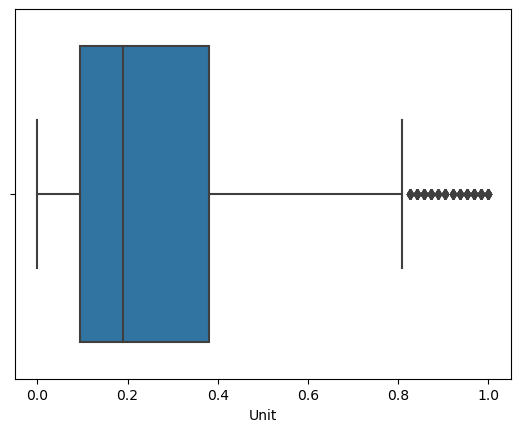

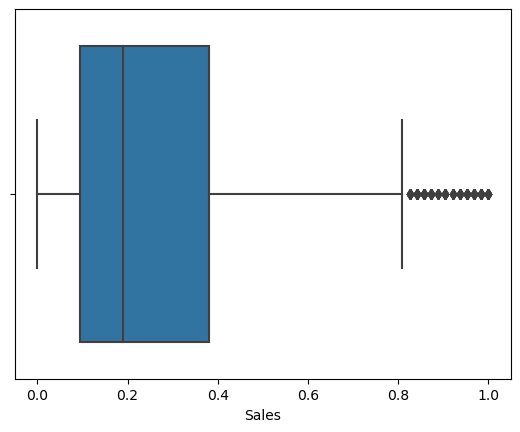

In [13]:
# Using seaborn for boxplot analysis
sns.boxplot(x = 'Unit', data = data)
plt.show()
sns.boxplot(x= 'Sales', data = data)
plt.show()

#### Analysis: As can be seen in the boxplot, the medain value is around 2 whereas mean is around .25, also 50% of data is distrubed betwwn value range 0.1 to 0.4. Also there are some outliers in our data.

In [14]:
# Using groupby on group column to determine the group with highest and lowest sales.
group_sales_data=data.groupby('Group')['Sales'].sum()
group_sales_data

Group
 Kids       480.142857
 Men        484.444444
 Seniors    473.571429
 Women      482.492063
Name: Sales, dtype: float64

##### Analysis: The group with the highest sale is 'Men' and the group with lowest sale is 'Seniors'.

In [15]:
group_sales_values= data.groupby('Group')['Sales'].agg(['max', 'min'])
group_sales_values

,max,min
Group,,
Kids,1.000000,0.0
Men,0.984127,0.0
Seniors,1.000000,0.0
Women,1.000000,0.0


In [16]:
# In order to generate weekly, monthly and quarterly sales report, we will use the resample function of pandas.

data=data.set_index('Date') # Setting index to Date column to use the resample function

weekly_sales_report=data.Sales.resample('W').sum()
weekly_sales_report


Date
2020-10-04     84.857143
2020-10-11    152.777778
2020-10-18    150.476190
2020-10-25    151.587302
2020-11-01    122.460317
2020-11-08    113.809524
2020-11-15    115.761905
2020-11-22    115.380952
2020-11-29    117.698413
2020-12-06    169.412698
2020-12-13    181.492063
2020-12-20    182.317460
2020-12-27    183.047619
2021-01-03     79.571429
Freq: W-SUN, Name: Sales, dtype: float64

In [17]:
monthly_sales_report=data.Sales.resample('M').sum()
monthly_sales_report

Date
2020-10-31    645.650794
2020-11-30    495.761905
2020-12-31    779.238095
Freq: M, Name: Sales, dtype: float64

In [18]:
quarterly_sales_report=data.Sales.resample('Q').sum()
quarterly_sales_report

Date
2020-12-31    1920.650794
Freq: Q-DEC, Name: Sales, dtype: float64

### Task 3: Data Visualization

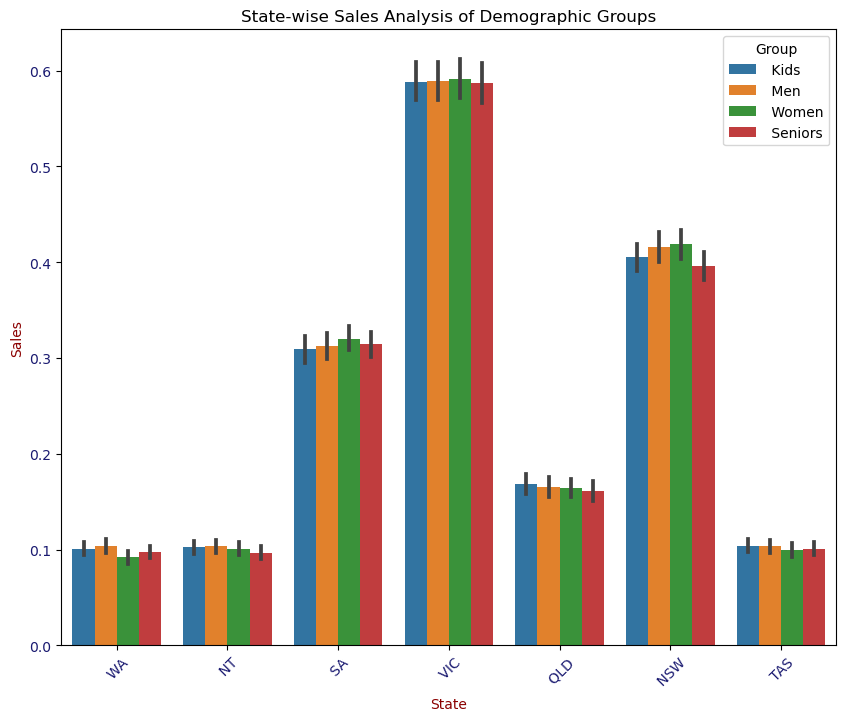

In [293]:
# State-wise Sales Analysis for Different Demographic Groups (Kids, Women, Men, and Seniors).
plt.figure(figsize= (10,8))
sns.barplot(x='State', y='Sales', hue='Group', data=data)
plt.title('State-wise Sales Analysis of Demographic Groups')
plt.ylabel('Sales', color= 'darkred')
plt.xlabel('State', color= 'darkred')
plt.xticks(rotation = 45, size = 10, color = 'midnightblue')
plt.yticks( size=10, color = 'midnightblue')
plt.show()

#### Analysis: The state with the highest sale is VIC followed by NSW. Interestengly for both the states women group has contributed to highest sales.

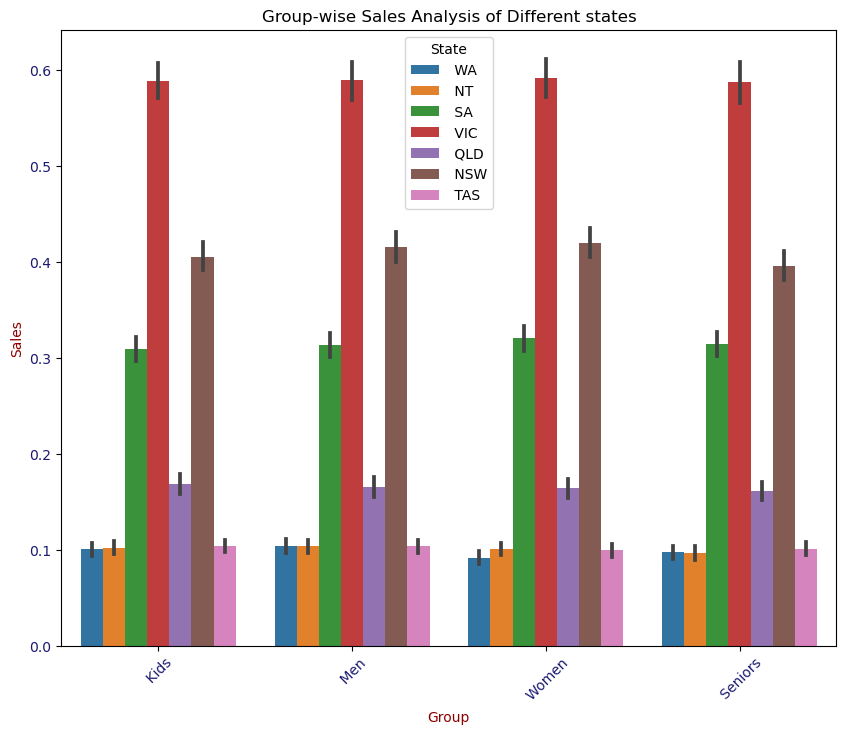

In [19]:
# Group-wise sales analysis (Kids, Women, Men, and Seniors) across various states.
plt.figure(figsize= (10,8))
sns.barplot(x='Group', y='Sales', hue='State', data=data)
plt.title('Group-wise Sales Analysis of Different states')
plt.ylabel('Sales', color= 'darkred')
plt.xlabel('Group', color= 'darkred')
plt.xticks(rotation = 45, size = 10, color = 'midnightblue')
plt.yticks( size=10, color = 'midnightblue')
plt.show()

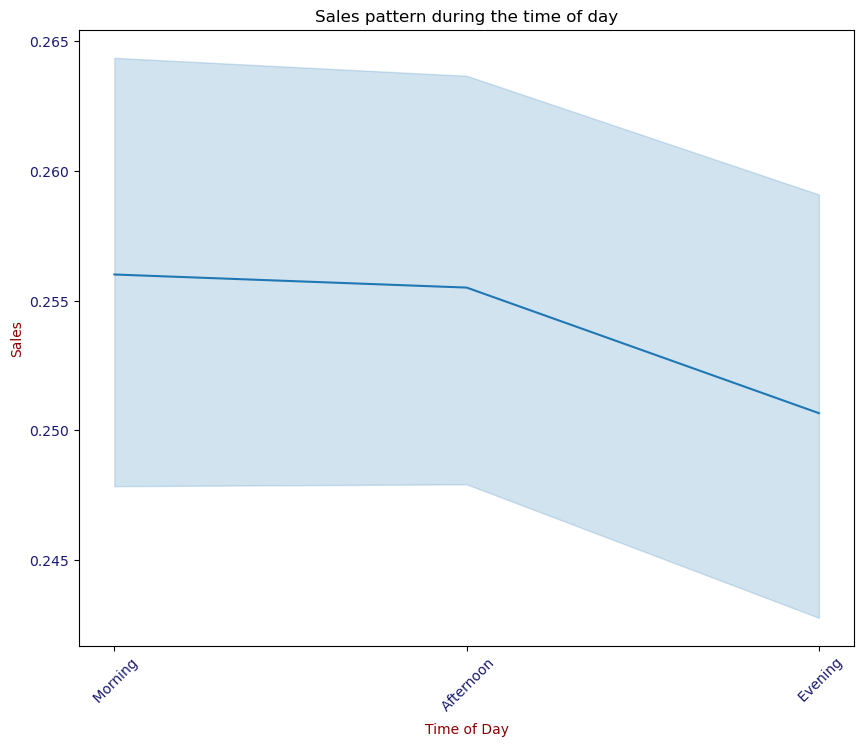

In [20]:
# Time-of-the-day analysis: Identify peak and off-peak sales periods.
plt.figure(figsize= (10,8))
sns.lineplot( x= 'Time', y='Sales', data=data)
plt.title('Sales pattern during the time of day')
plt.ylabel('Sales', color= 'darkred')
plt.xlabel('Time of Day', color= 'darkred')
plt.xticks(rotation = 45, size = 10, color = 'midnightblue')
plt.yticks( size=10, color = 'midnightblue')
plt.show()

#### Analysis: The line plot shows that the sales pattern declines during the day. It's at peak in the morning and off peak period is evening.

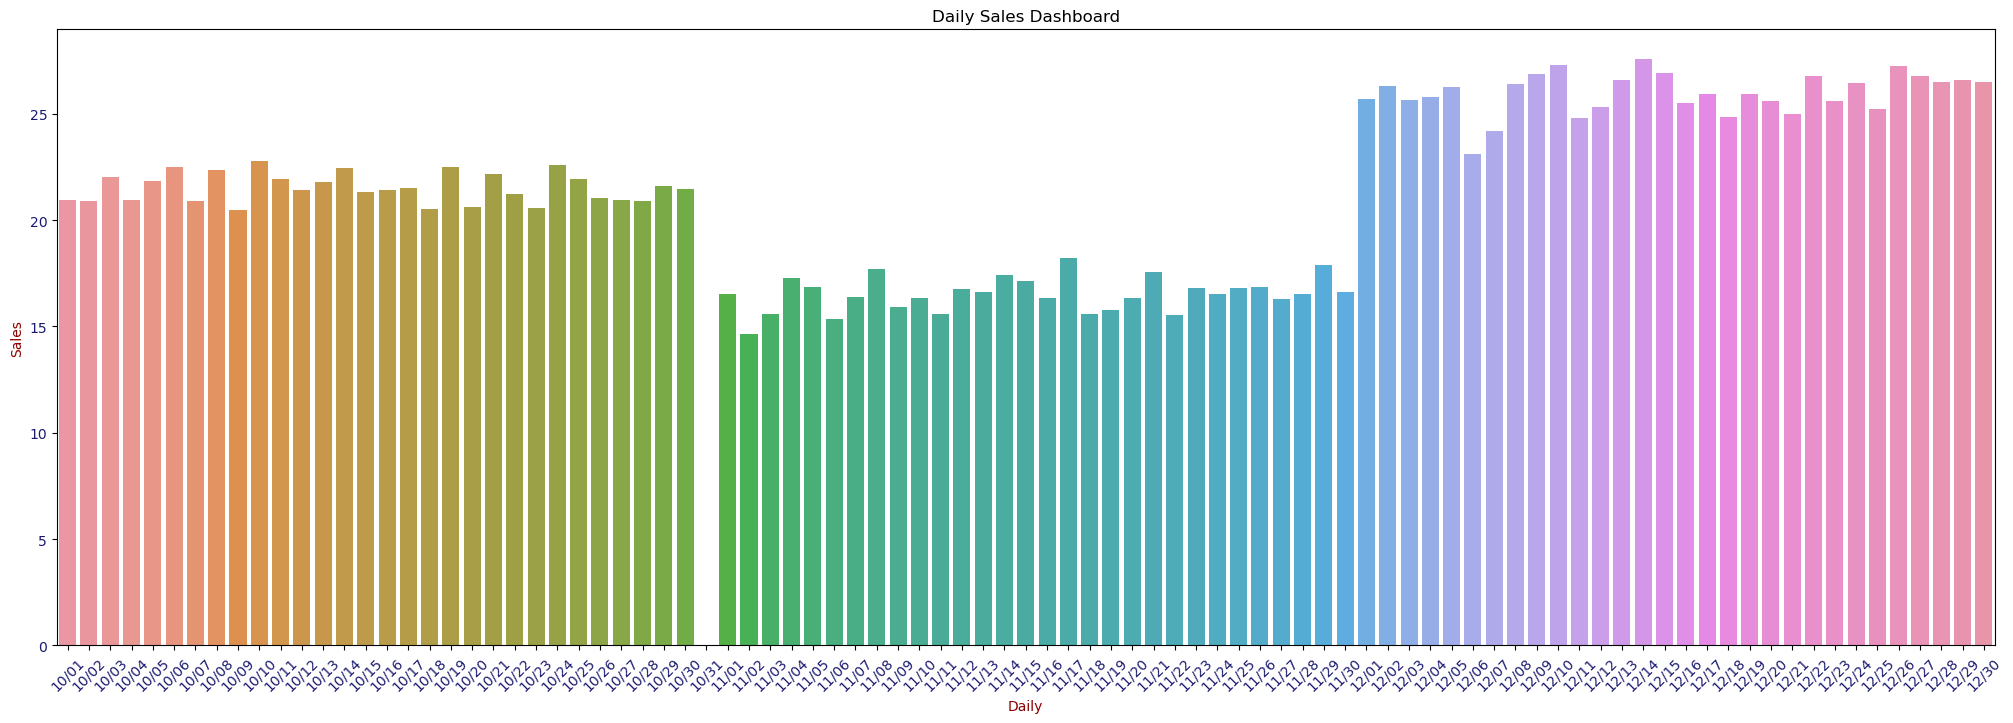

In [21]:
# Dashboard containing daily, weekly, monthly, and quarterly charts

# Daily sales Dashboard
daily_sales_report= data.Sales.resample('D').sum()
plt.figure(figsize= (25,8))
sns.barplot(x= daily_sales_report.index.strftime('%m/%d'), y=daily_sales_report.values)
plt.title('Daily Sales Dashboard')
plt.ylabel('Sales', color= 'darkred')
plt.xlabel('Daily', color= 'darkred')
plt.xticks(rotation = 45, size = 10, color = 'midnightblue')
plt.yticks( size=10, color = 'midnightblue')
plt.show()



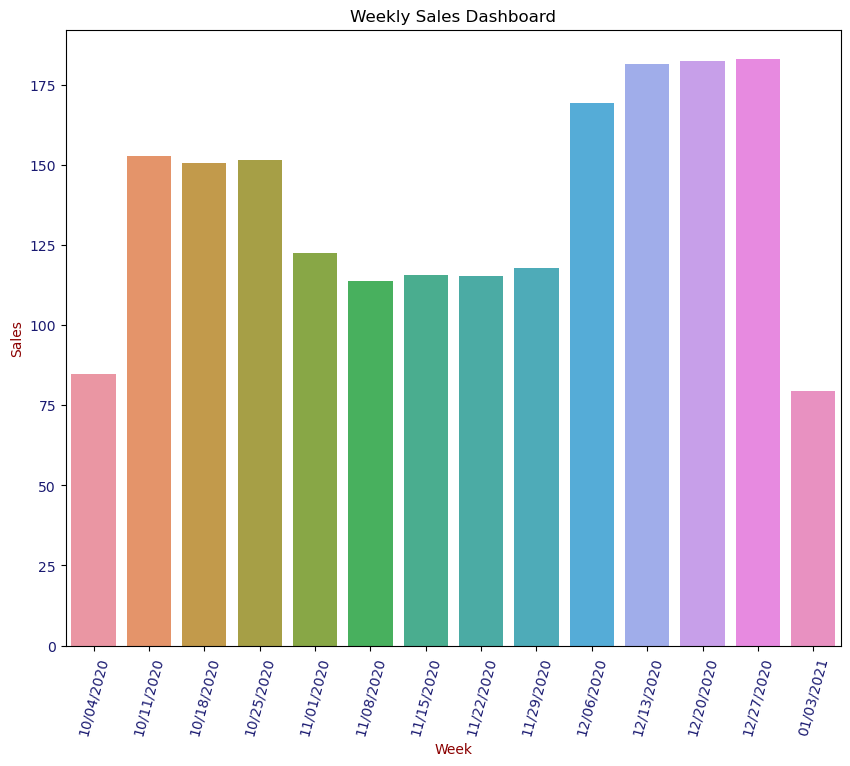

In [297]:
# Weekly sales Dashboard

plt.figure(figsize= (10,8))
sns.barplot(x= weekly_sales_report.index.strftime('%m/%d/%Y'), y=weekly_sales_report.values)
plt.title('Weekly Sales Dashboard')
plt.ylabel('Sales', color= 'darkred')
plt.xlabel('Week', color= 'darkred')
plt.xticks(rotation = 75, size = 10, color = 'midnightblue')
plt.yticks( size=10, color = 'midnightblue')
plt.show()

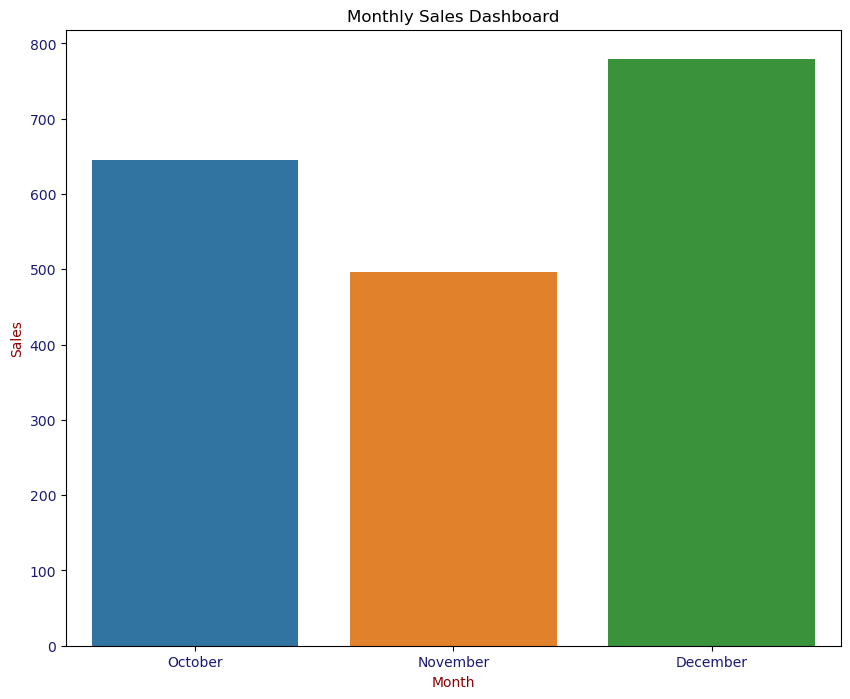

In [22]:
# Monthly Sales Dashboard
plt.figure(figsize= (10,8))
sns.barplot(x= monthly_sales_report.index.strftime('%B'), y=monthly_sales_report.values)
plt.title('Monthly Sales Dashboard')
plt.ylabel('Sales', color= 'darkred')
plt.xlabel('Month', color= 'darkred')
plt.xticks(rotation = 0, size = 10, color = 'midnightblue')
plt.yticks( size=10, color = 'midnightblue')
plt.show()

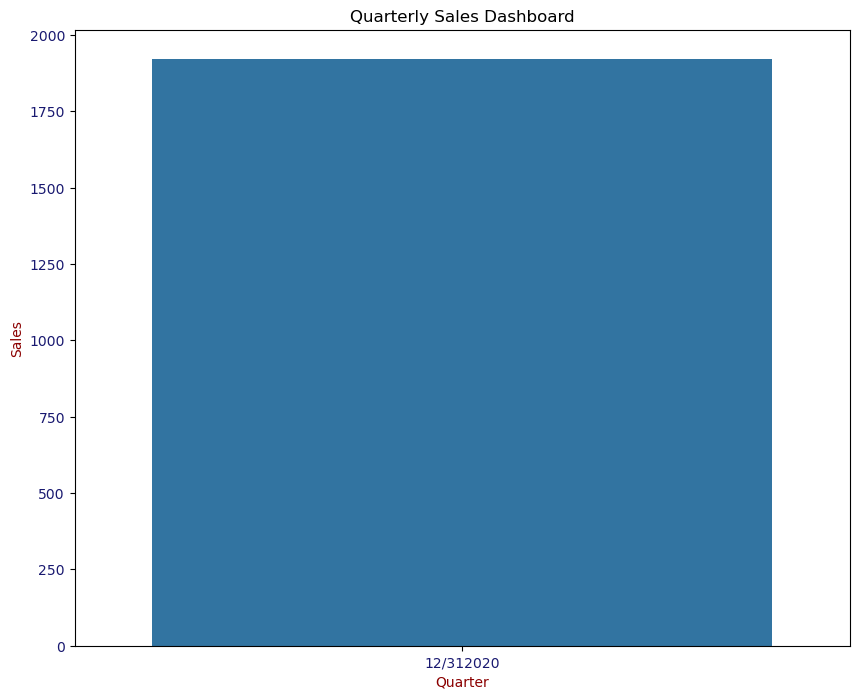

In [23]:
# Quarterly Sales Dashboard
plt.figure(figsize= (10,8))
sns.barplot(x= quarterly_sales_report.index.strftime('%m/%d%Y'), y=quarterly_sales_report.values)
plt.title('Quarterly Sales Dashboard')
plt.ylabel('Sales', color= 'darkred')
plt.xlabel('Quarter', color= 'darkred')
plt.xticks(rotation = 0, size = 10, color = 'midnightblue')
plt.yticks( size=10, color = 'midnightblue')
plt.show()